# Linear Regression
- Linear Regression is a statistical model used to predict the relationship between independent and dependent variables denoted by x and y respectively.
-> Equation for Liner Regression : y  = mx + c

    - y = dependent variable 
    - x = independent variable. 
    - c = intercept of regression line.
    - m = slope of relationship.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../SDataset/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
[col for col in df]

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isna().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

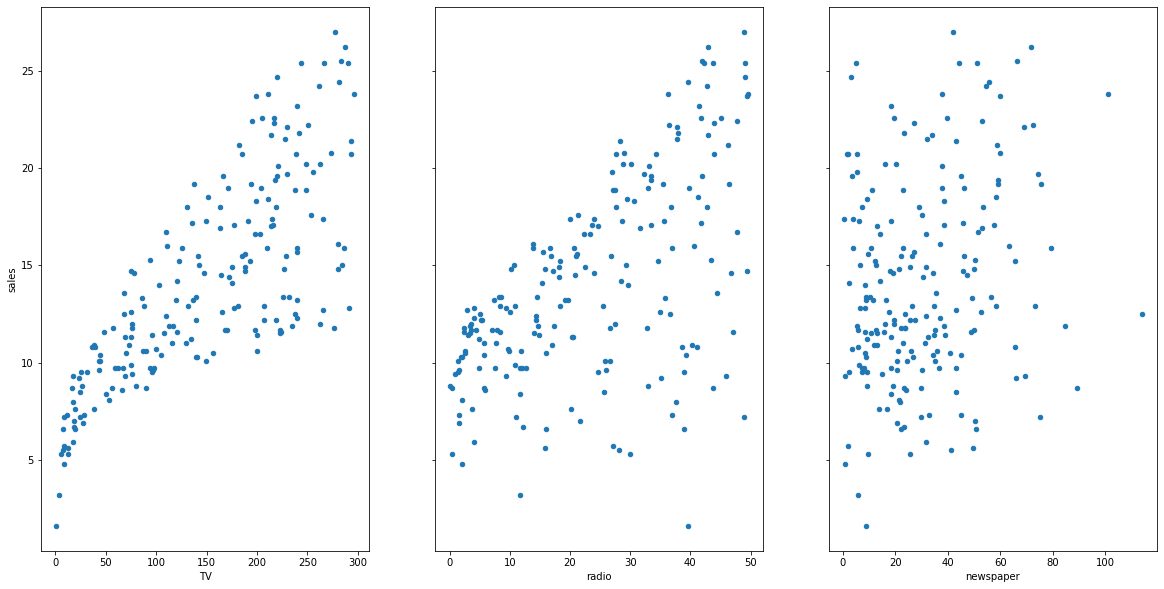

In [9]:
# visualize features between target and sales variable
fig, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0],figsize = (20,10))
df.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
df.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV','radio','newspaper']],  df.sales, test_size = 0.25)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((150, 3), (150,), (50, 3), (50,))

In [12]:
X_train['TV']
Y_train

162    14.9
185    22.6
80     11.8
175    27.0
176    20.2
       ... 
134    10.8
141    19.2
58     23.8
106     7.2
54     20.2
Name: sales, Length: 150, dtype: float64

In [13]:
X = pd.DataFrame(pd.concat([X_train['TV'],Y_train], axis = 1))
X.head()

,TV,sales
162,188.4,14.9
185,205.0,22.6
80,76.4,11.8
175,276.9,27.0
176,248.4,20.2


In [14]:
Y = pd.DataFrame(pd.concat([X_test['TV'],Y_test], axis = 1))
Y.head()

,TV,sales
94,107.4,11.5
47,239.9,23.2
166,17.9,8.0
67,139.3,13.4
40,202.5,16.6


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression(normalize = True)
lr.fit(X[['TV']], X['sales'])

LinearRegression(normalize=True)

In [17]:
#help(lr)

In [18]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [19]:
lr.intercept_

7.090351669541135

In [20]:
lr.coef_

array([0.04543736])

In [21]:
pred = lr.predict(Y[['TV']])
pred

array([11.97032455, 17.99077527,  7.90368048, 13.41977646, 16.29141786,
       15.49172026, 15.62348861, 16.78668513, 17.10929041, 17.1956214 ,
        9.04415832, 17.10020294, 17.87718186, 13.46521383, 17.99986275,
       12.07937423, 19.2175841 , 13.42886394, 14.74200375, 17.99986275,
       16.12784335, 10.64355353, 10.98433376,  7.94457411, 17.1956214 ,
       10.29822956, 19.52655817, 13.0744525 ,  8.33987918, 11.65226301,
       17.07748426, 11.52049465,  8.30807302, 15.04643409, 18.49058628,
       10.73442826, 20.253556  , 13.58335097, 10.5026977 ,  7.980924  ,
       11.35692014, 15.38721432, 17.54548911, 20.43076172, 20.39895556,
       10.22552978, 13.35616415, 12.22023006, 12.36108588, 14.5102732 ])

Text(0.5, 1.0, 'Linear Regression on TV')

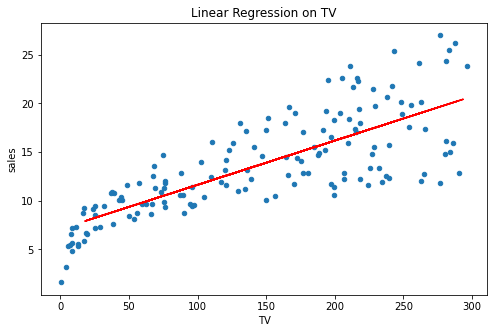

In [22]:
X.plot(kind = 'scatter', x = 'TV', y = 'sales', figsize = (8,5))
plt.plot(Y[['TV']], pred, c = 'red')
plt.title('Linear Regression on TV')

# Accuracy Metrics

### Mean Squared Error : $ (1/N)\sum_{i=1}^{N}(y_i - \bar y_i)^2 $
   
 - where $N$ is the number of data points
 - $𝑦_i$ is the predicted value by the model
 - $\bar y_i$ is the actual value for the data point
 
<p> This metrics are called the loss function or the cost function, and the value has to be minimized

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(pred, Y['TV'])

25985.836592722473

### Root Mean Squared Error : $ \sqrt{(1/N)\sum_{i=1}^{N}(y_i - \bar y_i)^2} $
   
 - where $N$ is the number of data points
 - $𝑦_i$ is the predicted value by the model
 - $\bar y_i$ is the actual value for the data point
 
<p> This metrics are called the loss function or the cost function, and the value has to be minimized

In [25]:
np.sqrt(mean_squared_error(pred, Y['TV']))

161.20123012161685